In [1]:
# 結果を見やすくするために警告を非表示にする
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np

%matplotlib inline

## 準備
- `digits` を2クラス分類として捉える
    - 陽性: 9
    - 陰性: 0, 1, 2, 3, 4, 5, 6, 7, 8

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()

In [4]:
# 説明を確認
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
# 「9」のデータだけを陽性とする
y = digits.target == 9

y

array([False, False, False, ..., False,  True, False])

In [6]:
from sklearn.model_selection import train_test_split

# 教師データの分割
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [7]:
# DummyClassifier: 常に 多数のクラス(=「9以外」) を予測するクラス使って「精度」の意味を考える

from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy="most_frequent")
dummy_majority.fit(X_train, y_train)

# テストデータでの「精度」を確認する
print(f"Test score: {dummy_majority.score(X_test, y_test):.2f}")

Test score: 0.90


### 学習データの多数側をただ出力するだけなのに 「精度」 90% ！？
- `DummyClassifier(strategy="most_frequent")` は ただ多数のクラスを予測するだけ

In [8]:
# 決定木 と比較してみる
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

print(f"Test score: {tree.score(X_test, y_test):.2f}")

Test score: 0.92


### 決定木の方が ちょっとだけ 「精度」がいいけど...
- とはいえ、Dummyでも 90% 
- ということは、「精度」の指標として「正答率」は良くない基準なのでは？

### 一応、ほかの分類アルゴリズムでの比較も試してみる
- `DummyClassifier`: ランダムな予測をする(=「9」or「9以外」)
- `LogisticRegression`

In [9]:
# `DummyClassifier`: デフォルト では ランダムな予測をする(=「9」or「9以外」)
dummy = DummyClassifier()

dummy.fit(X_train, y_train)

print(f"Dummy score: {dummy.score(X_test, y_test):.2f}")

Dummy score: 0.84


In [10]:
# LogsticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1)

logreg.fit(X_train, y_train)

print(f"Logreg score: {logreg.score(X_test, y_test):.2f}")

Logreg score: 0.98


### 結果
- LogisticRegression では 98% の「精度」を達成
    - しかし、ランダムにやったとしても 80% の精度がでる...

### ポイント
-  偏ったデータに対する 予測性能の評価基準 として 正答率は不適
    - 今回は  9以外のデータ が多いという偏りがあった
    
    
### ただひたすら頻度が大きいものを予測するヤバさ
- 1万人に1人にしか起こらない薬剤性副作用
    - たとえば、副作用が起こる 真の確率 が0.01% なら、とりあえず副作用が起きないと予測すれば、正答率は99.9%になる


## 混同行列(Confusion Matrix)

In [11]:
from sklearn.metrics import confusion_matrix

# LogsticRegressoin で テストデータ での予測
pred_logreg = logreg.predict(X_test)


confusion = confusion_matrix(y_test, pred_logreg)

print(confusion)

[[401   2]
 [  8  39]]


In [12]:
# DataFrameにして、もっと見やすくする
import pandas as pd

df_confusion = pd.DataFrame(confusion,
                            index=["真: 9以外", "真: 9です"],
                            columns=["予測: 9以外", "予測: 9です"])

df_confusion

,予測: 9以外,予測: 9です
真: 9以外,401,2
真: 9です,8,39


/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


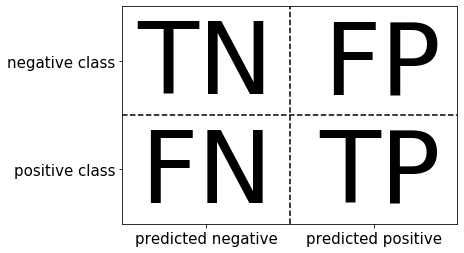

In [13]:
# 可視化のためだけに使うライブラリ
# !pip install mglearn

import mglearn

mglearn.plots.plot_binary_confusion_matrix()

## 4つの指標
1. TP: TruePositive (真陽性: 陽性 に対して 陽性 と判断)
2. FP: FalsePositive(偽陽性: 陰性 に対して 陽性 と判断)
3. FN: FalseNegative(偽陰性: 陽性 に対して 陰性 と判断)
4. TN: TrueNegative (真陰性: 陰性 に対して 陽性 と判断)

### 別の説明
1. 本当は陽性であり、検査結果も陽性(真陽性) ← 嬉しい！
2. 本当は陽性だけど、検査結果は陰性(偽陽性) ←残念...
3. 本当は陰性だけど、検査結果は陽性(偽陰性) ← 残念
4. 本当は陰性であり、検査結果も陰性(真陰性) ← 嬉しい！


### 混同行列を使ってさっきのモデル群を比較してみる

In [14]:
pred_most_frequent = dummy_majority.predict(X_test)

print("多い方のクラスを予測するだけ")
print(confusion_matrix(y_test, pred_most_frequent))

多い方のクラスを予測するだけ
[[403   0]
 [ 47   0]]


In [15]:
pred_dummy = dummy.predict(X_test)

print("ダミー分類")
print(confusion_matrix(y_test, pred_dummy))

ダミー分類
[[361  42]
 [ 44   3]]


In [16]:
pred_tree = tree.predict(X_test)

print("決定木")
print(confusion_matrix(y_test, pred_tree))

決定木
[[390  13]
 [ 24  23]]


In [17]:
pred_logreg = logreg.predict(X_test)

print("ロジスティック回帰")
print(confusion_matrix(y_test, pred_logreg))

ロジスティック回帰
[[401   2]
 [  8  39]]


### 混同行列を見比べるのは結構大変
- もっと見やすい指標を使う

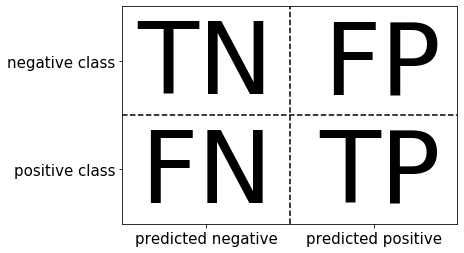

In [18]:
mglearn.plots.plot_binary_confusion_matrix()

### 適合率(Precision)
Precisionは「機械学習モデルがPositiveと予測した中で、本当にPositiveだと的中させたか」という意味。
(分類器が 9であると予測した データのうち、本当に9だった データの割合)


$$
Precision = \frac{TP}{TP + FP}
$$


### 再現率(Recall)
Recallは「本当にPositiveなものに対して、機械学習モデルがどれだけPositiveだと予測できたか(その真実を再現できたか)」という意味。
(本当に9であるデータ のうち、分類器が 正しく9である と分類できた割合)

$$
Recall = \frac{TP}{TP + FN}
$$


#### 使いどころ
- 偽陰性を避ける時に使う
    - ex: ガン検診: どっちがヤバい？
        - ガンじゃないけど、ガンと診断(偽陽性)
        - ガンなのに、ガンじゃないと診断(偽陰性)

### F-値
- Precision と Recall を総合的に判断するイメージ
- 2クラス分類でよく使われる指標
- 正答率に比べると解釈が難しい

$$
F = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}  = \frac{2Precision * Recall}{Precision+Recall}
$$




In [19]:
from sklearn.metrics import f1_score

print(f"最も多い方のクラス: {f1_score(y_test, pred_most_frequent):.2f}")
print(f"ダミー分類: {f1_score(y_test, pred_dummy):.2f}")
print(f"決定木: {f1_score(y_test, pred_tree):.2f}")
print(f"ロジスティック回帰: {f1_score(y_test, pred_logreg):.2f}")

最も多い方のクラス: 0.00
ダミー分類: 0.07
決定木: 0.55
ロジスティック回帰: 0.89
